In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

In [3]:
a = np.random.rand(2,1)

In [4]:
print(a)
print(a.dot(2))

[[0.27257945]
 [0.34754959]]
[[0.54515889]
 [0.69509918]]


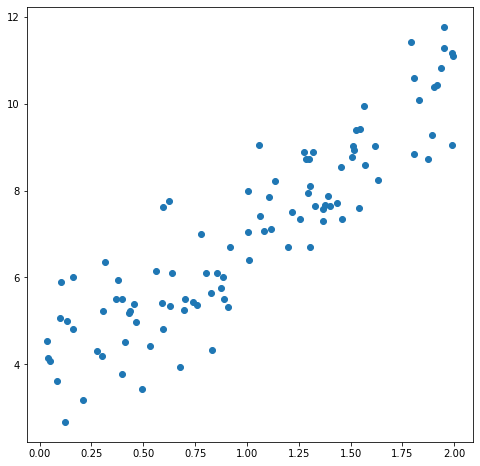

In [5]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X,y)
plt.show()

In [6]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [7]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [8]:
theta = np.random.randn(2,1)
print(theta)

[[-1.02513402]
 [-0.40119948]]


In [9]:
lr =0.01
n_iter = 1000

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.469,
Theta1:          3.489
Final cost/MSE:  4266.636


In [10]:
theta = np.random.randn(2,1)
print(theta)

[[-0.08961872]
 [ 1.09581419]]


In [113]:
X = 2 * np.random.rand(100,1)
Y = 4 +3 * X+np.random.randn(100,1)




In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

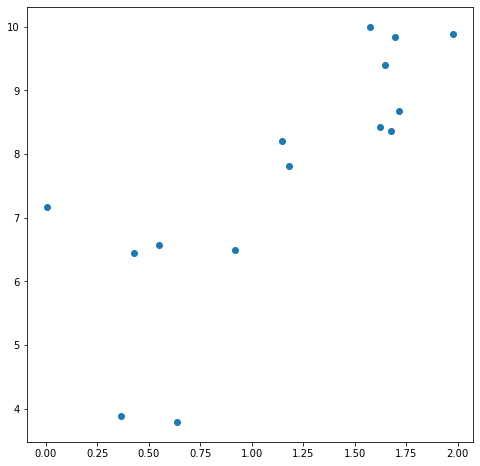

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X,Y)
plt.show()

In [13]:
np.random.randn(2,1)

array([[0.9516178 ],
       [0.90561083]])

In [96]:
def gradient(fdx,X,Y):
    total = 0
    
    for x,y in zip(X,Y):
        total += fdx(x,y)
    
    return total/len(X)

def sample(X,Y,batch_size):
    idx = np.random.randint(0,len(X), batch_size)
    x = np.take(X, idx)
    y = np.take(Y, idx)
    return x,y
    
def progress_plot(ax,model,X,x):
    minX = min(X)
    maxX = max(X)
    ax.plot([minX,maxX], [model.yhat(minX),model.yhat(maxX)], c="r", alpha=0.35, linewidth=0.1)
    ax.scatter(x,model.yhat(x), c="r", alpha=0.35, linewidth=0.1)


In [80]:
class LinearRegression():
    def __init__(self):
        # Initialise the parameters
        self.theta = [np.random.uniform(0,1,1) for _ in range(2)]
        self.derivatives = [self.dx_theta0, self.dx_theta1]
        
        self.z = [0,0]
        self.o = [0,0]
        self.grads_prev = [0,0]
        self.step = [1,1]
        
        self.t = 1
        
    def yhat(self,x):
        return self.theta[0] + self.theta[1]*x
    
    def dx_theta0(self,x,y):
        m = len(x)
        dx = -2*(y - self.yhat(x))
        gr = dx.sum() / m 
        return dx, gr
      
    def dx_theta1(self,x,y):
        m = len(x)
        dx = -2*x*(y - self.yhat(x))
        gr = dx.sum() / m         
        return dx, gr

    def mse(self,X,Y): 
        residuals = Y - self.yhat(X)
        RSS = (residuals**2).sum()
        return RSS/len(X)    
    
    def gd(self,xs,ys,attr):
        gr = [0,0]
        
        for i, dx in enumerate(self.derivatives):
            
            _, gr[i] = dx(xs,ys)
            self.theta[i] -= attr["lr"]*gr[i]

            
    def gd_m(self,xs,ys,attr):   
        
        gr = [0,0]
        for i, dx in enumerate(self.derivatives):
            
            _, gr[i] = dx(xs,ys)
                       
            self.z[i] = attr["decay"] * self.z[i] - attr["lr"] * gr[i]
            self.theta[i] += self.z[i]
  
    def rprop(self,xs,ys,attr):
        
        gr = [0,0] 

        for i, dx in enumerate(self.derivatives):
            
            _, gr[i] = dx(xs,ys)
            
            if gr[i] * self.grads_prev[i] > 0:
                self.step[i] = min(self.step[i] * attr["inc"], attr["step_sizes"][1])
                
            elif gr[i] * self.grads_prev[i] < 0:
                self.step[i] = max(self.step[i] * attr["dec"], attr["step_sizes"][0])

            self.theta[i] -= np.sign(gr[i]) * self.step[i]

        self.grads_prev = gr

    def rmsprop(self,xs,ys,attr):

        gr = [0,0] 
        for i, dx in enumerate(self.derivatives):
            
            _, gr[i] = dx(xs,ys)
            
            self.z[i] = attr["decay"] * self.z[i] + (1-attr["decay"])* (gr[i] **2)
        
            self.theta[i] -= attr["lr"] / np.sqrt(self.z[i] + attr["eps"]) * gr[i]

    def adam(self,xs,ys,attr):
        
        gr = [0,0] 
        for i, dx in enumerate(self.derivatives):
            
            _, gr[i] = dx(xs,ys)

            self.z[i] = attr["b"][0] * self.z[i] + (1 - attr["b"][0]) * gr[i]
            self.o[i] = attr["b"][1] * self.o[i] + (1 - attr["b"][1]) * (gr[i]**2)
   
            #Bias correction
            z_corr = self.z[i] / (1 - (attr["b"][0]**self.t))
            o_corr = self.o[i] / (1 - (attr["b"][1]**self.t))


            #Update parameters
            self.theta[i] -= attr["lr"] * z_corr / (np.sqrt(o_corr) + attr["eps"])
            
        self.t += 1
    
    def wame(self,xs,ys,attr):

        gr = [0,0] 
        for i, dx in enumerate(self.derivatives):
            _, gr[i] = dx(xs,ys)
            
            if gr[i] * self.grads_prev[i] > 0:
                self.step[i] = min(self.step[i] * attr["inc"], attr["step_sizes"][1])

            elif gr[i] * self.grads_prev[i] < 0:
                self.step[i] = max(self.step[i] * attr["dec"], attr["step_sizes"][0])

            self.z[i] = attr["a"] * self.z[i] + (1 - attr["a"] ) * self.step[i]
            self.o[i] = attr["a"] * self.o[i] + (1 - attr["a"]) * (gr[i]**2)
                        
            self.theta[i] -= attr["lr"] * gr[i] / (self.o[i] * self.z[i])

        self.grads_prev = gr 
    
    
    def __str__(self):
        return f"f(yhat) = {round(self.theta[0][0],2)} + {round(self.theta[1][0],2)}x"
    

    
    

In [106]:
def linear_model(X,Y, model,optimizer, opt_attr, sampling = True, iterations = 100, batch_size = 1):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    MSE = []
    for t in range(iterations):
        
        if sampling:
            xs,ys = sample(X,Y,batch_size)
        else: xs, ys = X, Y
        
        optimizer(xs,ys, attr=opt_attr)
        
        MSE.append([t,model.mse(X,Y)])
        
        progress_plot(ax1,model,X,xs)

    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")
    ax2.xaxis.grid(True,linestyle=":",color='black')
    plt.show()

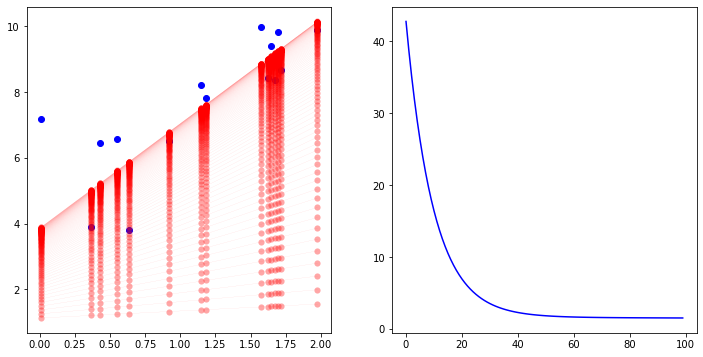

f(yhat) = 3.86 + 3.18x


In [51]:
lm = LinearRegression()

linear_model(X,Y,
            model = lm,
            optimizer = lm.gd,
            opt_attr = {"lr":0.01},
            sampling = False,
            iterations = 100
            )
print(lm)


#_, prediction, accuracy = nn.predict(X_test,y_test)
#print("\nAccuracy on test set {:.2f}%".format(accuracy))

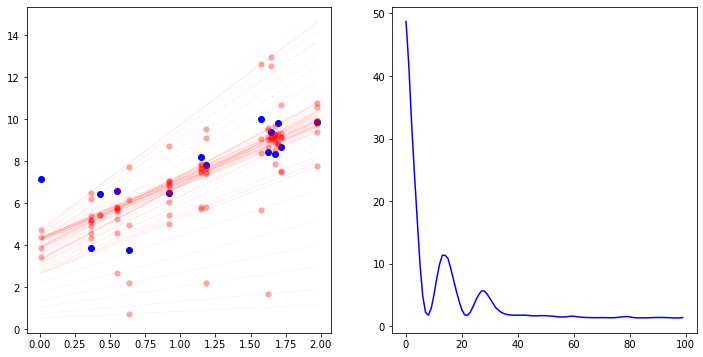

f(yhat) = 4.71 + 2.79x


In [52]:
lm = LinearRegression()

linear_model(X,Y,
            model = lm,
            optimizer = lm.gd_m,
            opt_attr = {"lr":0.01, "decay":0.9},
            sampling = True,
            iterations = 100,
            batch_size = 1
            )
print(lm)

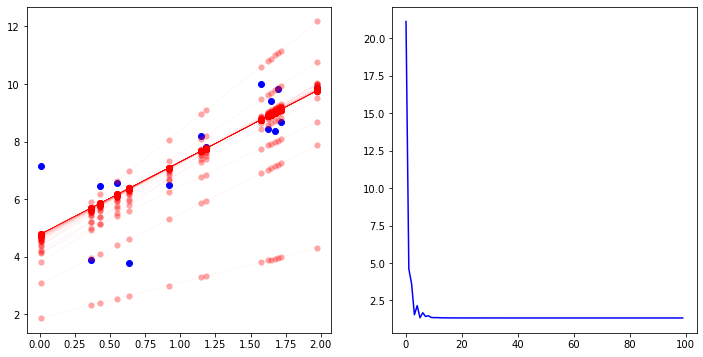

f(yhat) = 4.78 + 2.52x


In [58]:
lm = LinearRegression()

linear_model(X,Y,
            model = lm,
            optimizer = lm.rprop,
            opt_attr = {"decay":0.9, "inc":1.2 ,"dec":0.5, "step_sizes":(0.000001,50)},
            sampling = False,
            iterations = 100,
            batch_size = 1
            )
print(lm)

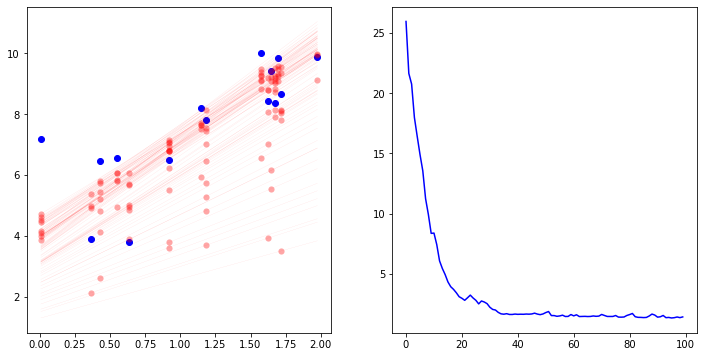

f(yhat) = 4.7 + 2.83x


In [65]:
lm = LinearRegression()

linear_model(X,Y,
            model = lm,
            optimizer = lm.rmsprop,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001},
            sampling = True,
            iterations = 100,
            batch_size = 1
            )
print(lm)

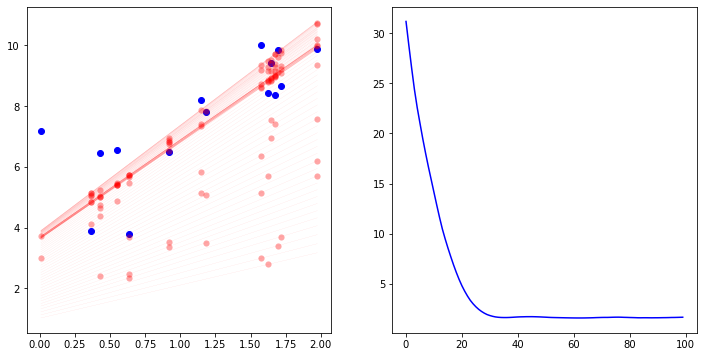

f(yhat) = 3.64 + 3.16x


In [71]:
lm = LinearRegression()

linear_model(X,Y,
            model = lm,
            optimizer = lm.adam,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001, "b":(0.9,0.999), "eps":0.000001},
            sampling = True,
            iterations = 100,
            batch_size = 1
            )
print(lm)

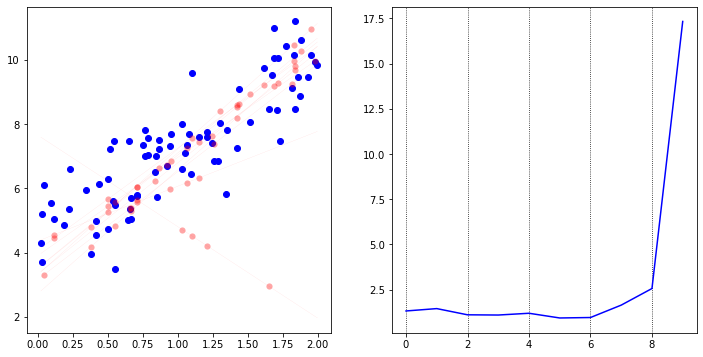

f(yhat) = 7.65 + -2.84x
18.60496060995922


In [128]:
lm = LinearRegression()

linear_model(X_train,y_train,
            model = lm,
            optimizer = lm.wame,
            opt_attr = {"lr":0.3, "a":0.9, "inc":1.2 ,"dec":0.1, "step_sizes":(0.0001,100)},
            sampling = True,
            iterations = 10,
            batch_size = 5
            )
print(lm)

print(lm.mse(X_test,y_test))

In [94]:
import numpy as np
import pandas as pd










def GD(model,X,Y,learning_rate=0.01, epochs=100):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    MSE = []
    for t in range(epochs):
        
        model.theta[0] = model.theta[0] - learning_rate*gradient(model.dx_theta0,X,Y)
        model.theta[1] = model.theta[1] - learning_rate*gradient(model.dx_theta1,X,Y)
        
        MSE.append([t,mse(model,X,Y)])

        progress_plot(ax1,model,X,X)

    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()
    
    
def SGD(model,X,Y,learning_rate=0.01, epochs=100, batch_size=1):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    MSE = []
    for t in range(epochs):
        
        #random sample
        xs,ys = sample(X,Y,batch_size)

        model.theta[0] -= learning_rate*gradient(model.dx_theta0,xs,ys)
        model.theta[1] -= learning_rate*gradient(model.dx_theta1,xs,ys)

        MSE.append([t,mse(model,xs,ys)])
        
        progress_plot(ax1,model,X,xs)

    
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b") 
    plt.show()
    
    
def SGD_momentum(model,X,Y,learning_rate=0.01, epochs=100, batch_size=1, decay=0.9):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    g = [0,0]  
    MSE = []
    
    for t in range(epochs):
        
        #random sample
        xs,ys = sample(X,Y,batch_size)

        g[0] = decay*g[0] - learning_rate * gradient(model.dx_theta0,xs,ys)
        g[1] = decay*g[1] - learning_rate * gradient(model.dx_theta1,xs,ys)
        
        model.theta[0] += g[0]
        model.theta[1] += g[1]
        
        MSE.append([t,mse(model,xs,ys)])
        
        progress_plot(ax1,model,X,xs)
    
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()


def rprop(model,X,Y, epochs=100, incF=1.2, decF=0.5):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    MSE = []
    step_sizes = [1,1]
    max_step_size = 50
    min_step_size = 0.000001    
    prev_gradients = [0,0]
    
    for t in range(epochs):
    
        gradients = [
                gradient(model.dx_theta0,X,Y),
                gradient(model.dx_theta1,X,Y)
                ]  
        
        for i in range(len(gradients)):
            
            if gradients[i]*prev_gradients[i] > 0:
                step_sizes[i] = min(step_sizes[i]*incF, max_step_size)
            elif gradients[i]*prev_gradients[i] < 0:
                step_sizes[i] = max(step_sizes[i]*decF, min_step_size)
        
        
        model.theta[0] -= np.sign(gradients[0])*step_sizes[0]
        model.theta[1] -= np.sign(gradients[1])*step_sizes[1]

        prev_gradients = gradients
        
        MSE.append([t,mse(model,X,Y)])

        progress_plot(ax1,model,X,X)

    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()
    
def rmsprop(model,X,Y,learning_rate=0.01, epochs=100, batch_size=1, decay=0.9, eps=0.00000000001):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    # Previous running mean value
    E = [0,0]
    MSE = []
    
    for t in range(epochs):
        
        #random sample
        xs,ys = sample(X,Y,batch_size)      
        
        E[0] = decay*E[0] + (1-decay)*(gradient(model.dx_theta0,xs,ys)**2)
        E[1] = decay*E[1] + (1-decay)*(gradient(model.dx_theta1,xs,ys)**2)
        
        model.theta[0] -= learning_rate/np.sqrt(E[0]+eps)*gradient(model.dx_theta0,xs,ys)
        model.theta[1] -= learning_rate/np.sqrt(E[1]+eps)*gradient(model.dx_theta1,xs,ys)
        
        MSE.append([t,mse(model,xs,ys)])
        
        progress_plot(ax1,model,X,xs)        
       
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()

def adam(model,X,Y,learning_rate=0.01, epochs=100, batch_size=1, b1=0.9, b2=0.999, eps=0.00000000001):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    
    # Previous running mean value
    m = [0,0]
    v = [0,0]
    v_corr = [0,0]
    m_corr = [0,0]
    MSE = [] 

    for t in range(1,epochs):   
        #random sample
        xs,ys = sample(X,Y,batch_size)
        
        # Update m & v
        m[0] = b1*m[0] + (1-b1)*gradient(model.dx_theta0,xs,ys)
        m[1] = b1*m[1] + (1-b1)*gradient(model.dx_theta1,xs,ys)
        
        v[0] = b2*v[0] + (1-b2)*(gradient(model.dx_theta0,xs,ys)**2)
        v[1] = b2*v[1] + (1-b2)*(gradient(model.dx_theta1,xs,ys)**2)    
        
        #Bias correction
        
        m_corr[0] = m[0] / (1 - (b1**t))
        m_corr[1] = m[1] / (1 - (b1**t))
        
        v_corr[0] = v[0] / (1 - (b2**t))
        v_corr[1] = v[1] / (1 - (b2**t))
        
        #Update parameters
        model.theta[0] -= learning_rate*m_corr[0]/(np.sqrt(v_corr[0])+eps)
        model.theta[1] -= learning_rate*m_corr[1]/(np.sqrt(v_corr[1])+eps)
     
        MSE.append([t,mse(model,xs,ys)])
        
        progress_plot(ax1,model,X,xs)        
       
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()
        
def wame(model,X,Y, learning_rate=0.01 , epochs=100, b=0.9, incF=1.2, decF=0.1, max_step = 100, min_step = 0.01, batch_size=1,  eps=0.00000000001):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    ax1.scatter(X,Y, c="b")
    """
    b: decay
    
    """
    MSE = []
    step_sizes = [1,1] 
    prev_gradients = [1,1]
    
    # Exponentially-weighted moving average EWMA initialised at 0
    Z = [0,0]
    O = [0,0]

    for t in range(epochs):

        #random sample
        xs,ys = sample(X,Y,batch_size)
        
        gradients = [
                gradient(model.dx_theta0,X,Y),
                gradient(model.dx_theta1,X,Y)
                ]  
        
        for i in range(len(gradients)):
            
            if gradients[i]*prev_gradients[i] > 0:
                step_sizes[i] = min(step_sizes[i]*incF, max_step)
                
                
            elif gradients[i]*prev_gradients[i] < 0:
                step_sizes[i] = max(step_sizes[i]*decF, min_step)
        
        
        Z[0] = b*Z[0] + (1-b)*step_sizes[0]
        Z[1] = b*Z[1] + (1-b)*step_sizes[1]
        
        O[0] = b*O[0] + (1-b)*(gradients[0]**2)
        O[1] = b*O[1] + (1-b)*(gradients[1]**2)
        
        model.theta[0] -= learning_rate*gradients[0] / (O[0] *Z[0])
        model.theta[1] -= learning_rate*gradients[1] / (O[1] *Z[1])
        
        prev_gradients = gradients
        
        MSE.append([t,mse(model,xs,ys)])
        
        progress_plot(ax1,model,X,xs)        
       
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="b")   
    plt.show()        

In [318]:
X = 2 * np.random.rand(15,1)
Y = 4 +3 * X+np.random.randn(15,1)

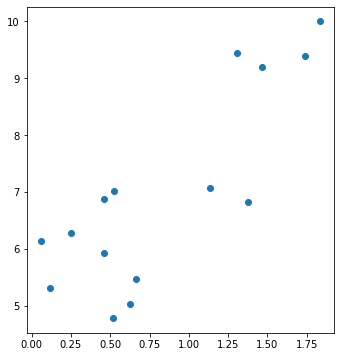

In [324]:
fig, ax = plt.subplots(figsize = (5.5,6))
ax.scatter(X,Y)
plt.show()

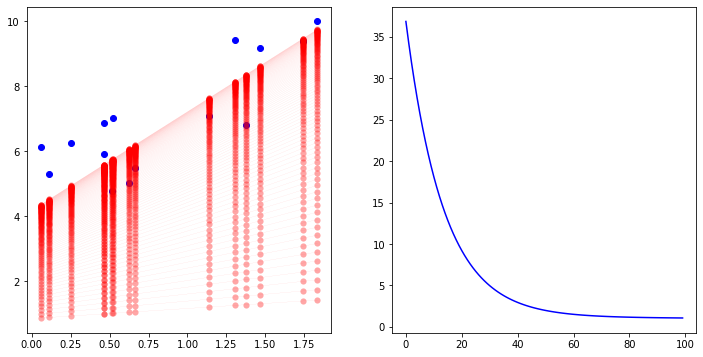

f(yhat) = 4.18 + 3.04x


In [325]:
model = LinearRegression()
GD(model,X,Y)
print(model)

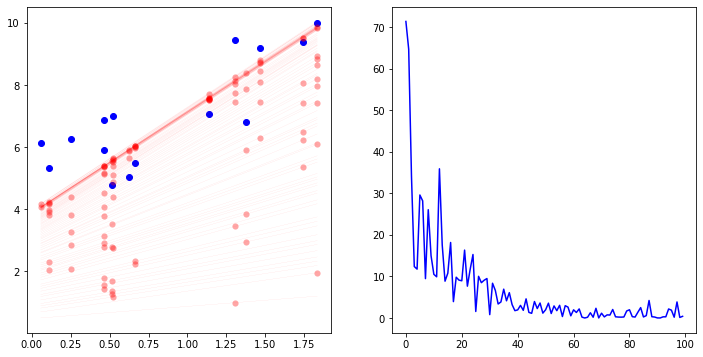

f(yhat) = 3.97 + 3.29x


In [338]:
model = LinearRegression()
SGD(model,X,Y)
print(model)

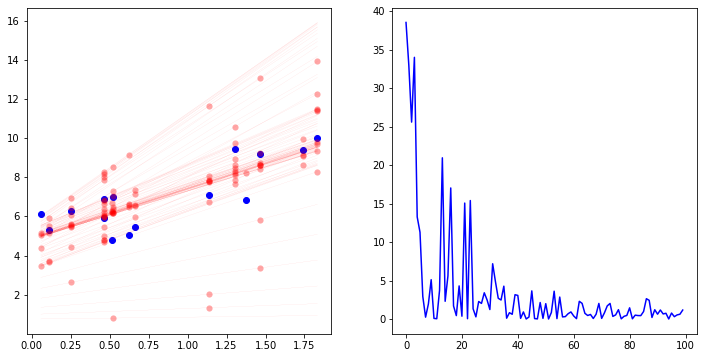

f(yhat) = 4.9 + 2.63x


In [348]:
model = LinearRegression()
SGD_momentum(model,X,Y)
print(model)

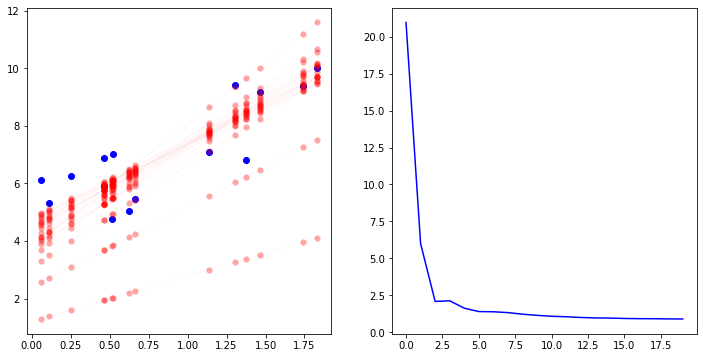

f(yhat) = 4.77 + 2.57x


In [366]:
model = LinearRegression()
rprop(model,X,Y, epochs=20)
print(model)

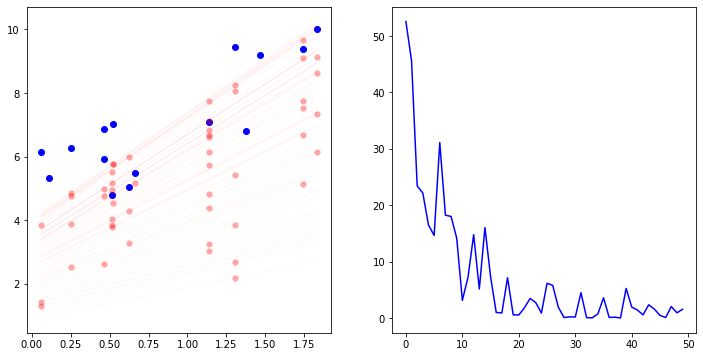

f(yhat) = 4.02 + 3.36x


In [370]:
model = LinearRegression()
rmsprop(model,X,Y, epochs=50, learning_rate=0.1)
print(model)

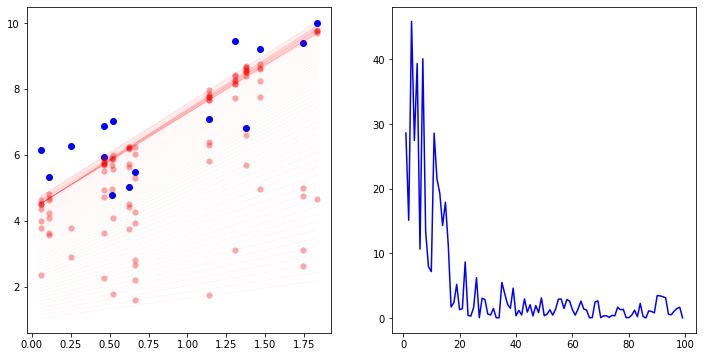

f(yhat) = 4.45 + 2.81x


In [392]:
model = LinearRegression()
adam(model,X,Y, epochs=100, learning_rate=0.1)
print(model)

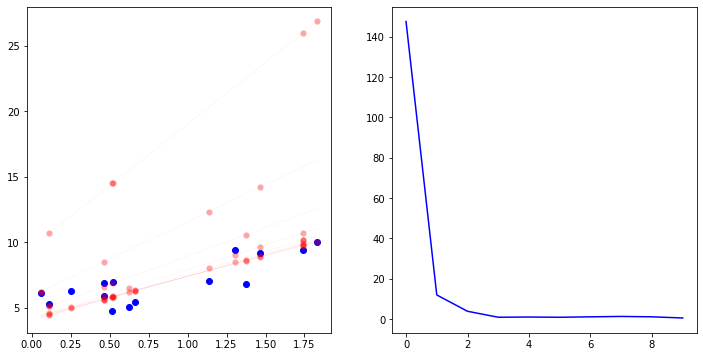

f(yhat) = 4.27 + 3.14x


In [411]:
model = LinearRegression()
wame(model,X,Y, epochs=10, learning_rate=0.1, batch_size=5)
print(model)

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

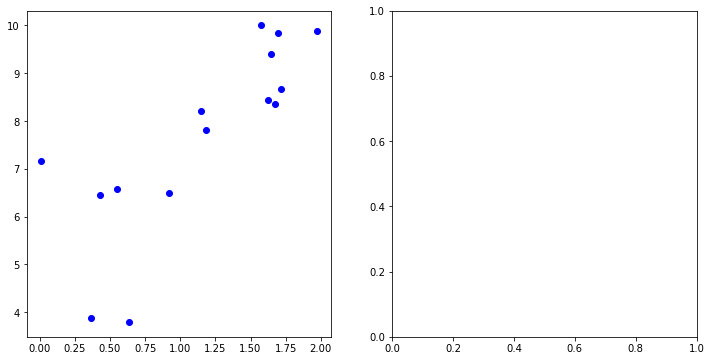

In [97]:
model = LinearRegression()
wame(model,X,Y, epochs=10, learning_rate=0.1, batch_size=5)
print(model)